In [1]:
import torch

In [7]:
import pandas as pd

# Importance of a good initialization

In [30]:
x = torch.randn(512)
a = torch.randn(512,512)

In [3]:
for i in range(100): x= a @ x

In [4]:
x.mean(), x.std()

(tensor(nan), tensor(nan))

values exploded to infinity

In [31]:
track = {'mean':[], 'std':[]}
for i in range(100):
    x = a @ x
    track['mean'] += [float(x.mean())]
    track['std']  += [float(x.std())]


In [32]:
df = pd.DataFrame(track)

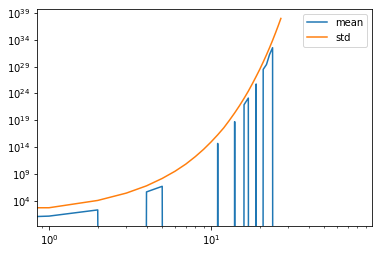

In [33]:
df.plot(logx=True, logy=True)

In [37]:
x = torch.randn(512)
a = torch.randn(512,512) * 0.01

In [38]:
for i in range(100): x= a @ x

In [39]:
x.mean(), x.std()

(tensor(0.), tensor(0.))

Activations have vanished.

- x and Ax must have the same scale
- initialize with an orthogonal matrix
- Use "spectral normalization"

# Magic number for normaization

In [41]:
import math

In [51]:
x = torch.randn(512)
a = torch.randn(512,512) / math.sqrt(512)

In [52]:
for i in range(100): x= a @ x

In [53]:
x.mean(), x.std()

(tensor(0.0429), tensor(1.5760))

In [54]:
x = torch.randn(512)
x.mean(), x.std()

(tensor(-0.0600), tensor(1.0673))

why 512?

In [62]:
mean,sqr = 0.,0.
for i in range(100):
    x = torch.randn(512)
    a = torch.randn(512, 512)
    y = a @ x
    mean += y.mean().item()
    sqr  += y.pow(2).mean().item()# std without the sqrt and mean is 0
mean/100,sqr/100

(0.019240555390715598, 509.9537435913086)

Since in in a mat mul of a @ x
for each entry of the result we sup 512 product of an element of 'a' and an element ox 'x'.
At scale they all have a mean of 0 and an std of 1
so summing 512 element each time gives a std of ~sqrt(512).

This can be proven like this:

In [64]:
mean, sqr = 0., 0.
for i in range(10000):
    x = torch.randn(1)
    a = torch.randn(1)
    y = a @ x
    mean += y.item()
    sqr += y.pow(2).item()
mean/10000, sqr/10000

(-0.0024057011512923963, 1.0143485332893798)

# Adding ReLU

How does matmul behaves with a ReLU:

In [67]:
mean, sqr = 0., 0.
for i in range(10000):
    x = torch.randn(1)
    a = torch.randn(1)
    y = a @ x
    y = 0 if y<0 else y.item()
    mean += y
    sqr += y**2
mean/10000, sqr/10000

(0.31896909568780313, 0.5006640718813885)

mean of squares is half of what it used to be, so we need to double the magic number: 2/512

In [69]:
mean,sqr = 0.,0.
for i in range(100):
    x = torch.randn(512)
    a = torch.randn(512, 512) * math.sqrt(2/512) # magic number
    y = a @ x
    y = y.clamp(min=0)
    mean += y.mean().item()
    sqr  += y.pow(2).mean().item()
mean/100,sqr/100

(0.566559180021286, 1.0011431044340133)